In [37]:
3+4

7

In [38]:
#install libraries with various functions and classes
!pip install wordcloud

!pip install gensim

!pip install nltk


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [39]:
!pip install pandas

Defaulting to user installation because normal site-packages is not writeable


In [40]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable


In [8]:
!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 394.3 MB 5.8 kB/s eta 0:00:017  |▎                               | 3.2 MB 3.4 MB/s eta 0:01:56     |▎                               | 4.0 MB 3.4 MB/s eta 0:01:56     |▍                               | 5.2 MB 3.4 MB/s eta 0:01:56     |█████▍                          | 66.4 MB 1.8 MB/s eta 0:03:02     |█████▌                          | 67.8 MB 1.8 MB/s eta 0:03:01     |███████                         | 87.2 MB 1.3 MB/s eta 0:03:52     |███████▌                        | 91.9 MB 2.9 MB/s eta 0:01:44     |███████▌                        | 92.5 MB 2.9 MB/s eta 0:01:44     |████████▍                       | 103.4 MB 5.0 MB/s eta 0:00:58     |█████████                       | 110.6 MB 1.9 MB/s eta 0:02:34     |██████████▏                     | 124.7 MB 2.0 MB/s eta 0:02:15     |██████████▏                     | 125.9 MB 2.0 MB/s eta 0:02:15     |██████████▎                     

     |████████████████████████████████| 137 kB 2.0 MB/s eta 0:00:01
     |███████████████████████████████▏| 143 kB 1.9 MB/s eta 0:00:01     |████████████████████████████████| 147 kB 1.9 MB/s 
  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4831 sha256=3c6c7549a1bba4c299d956034e8bc23b120e1ec1def0d8859c64093ae071f9b3
  Stored in directory: /home/zcamenard/.cache/pip/wheels/3f/e3/ec/8a8336ff196023622fbcb36de0c5a5c218cbb24111d1d4c7f2
Successfully built termcolor
  Attempting uninstall: numpy
    Found existing installation: numpy 1.20.1
    Uninstalling numpy-1.20.1:
      Successfully uninstalled numpy-1.20.1


In [19]:
# import key libraries (now that they have been downloaded)
#the "as" part just gives me a shorthand way to access the library
#accessing a function/class from the library is just a matter of doing libraryShortcutName.thingIwantToAccess
import pandas as pd #for creating dataframe objects
import numpy as np #matrices and such
import matplotlib.pyplot as plt #graphing
import seaborn as sns #analyzing dataframes
from wordcloud import WordCloud, STOPWORDS #fun way to visualize data
import nltk #natural language tool kit 
import re
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import gensim #text analysis
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
# Tensorflow
import tensorflow as tf #ml library
from tensorflow.keras.preprocessing.text import one_hot,Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding, Input, LSTM, Conv1D, MaxPool1D, Bidirectional, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical

In [12]:
#create an empty csv file which I'll copy paste the stock data into
!touch /home/zcamenard/pythonProjects/mlProject/stock_sentiment.csv    

In [83]:
!touch /home/zcamenard/pythonProjects/mlProject/stock_sentiment2.csv    

In [94]:
#Use pandas to read data into a pandas dataframe object
stock_df = pd.read_csv('stock_sentiment2.csv')

In [95]:
#view dataframe
stock_df

,created_at,Text,Sentiment
0,2013-01-01 20:10:04,Kickers on my watchlist $XIDE $TRIT $SOQ $PNK ...,positive
1,2013-01-01 20:33:37,"""@user: $AAPL MOVIE. 55% return for the FEAR/G...",positive
2,2013-01-01 21:43:41,@user I'd be afraid to short $AMZN - they are ...,positive
3,2013-01-02 01:49:48,$MNTA Over $12.00 URL,positive
4,2013-01-02 01:51:33,$OI Over $21.37 URL,positive
...,...,...,...
4995,2013-03-31 21:35:26,"If $AAPL goes to over $451, I will go short. S...",negative
4996,2013-03-31 21:37:55,$MMM looks ready to break out. Looking to go l...,positive
4997,2013-03-31 22:54:02,$AMZN - Closed over volume support inside of t...,positive
4998,2013-03-31 23:22:15,$BBT coiled up after finding support at 50/200...,positive


In [96]:
#info about the dataframe
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   created_at  5000 non-null   object
 1   Text        5000 non-null   object
 2   Sentiment   5000 non-null   object
dtypes: object(3)
memory usage: 117.3+ KB


In [97]:
# check for null values then sum the total number of null data
stock_df.isnull().sum()

created_at    0
Text          0
Sentiment     0
dtype: int64

/home/zcamenard/.local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Sentiment', ylabel='count'>

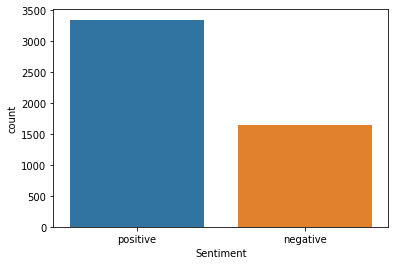

In [98]:
#use seaborn to see how many unique types of sentiment data there are
#seems that the seaborn library can be used to analyze pandas dataframes
sns.countplot(stock_df['Sentiment'])

In [99]:
#another way to see the number of data types for sentiment is via the dataframe object itself
#you can access the data column you want with square brackets kinda like an array
stock_df['Sentiment'].nunique() #nunique method returns number of unique types of data of that category
#oviously there are only 2 types of sentiment data - positive and negative

2

In [100]:
import string #for working with strings - which are a built in type in python, unlike c++

In [101]:
#Now we will clean the data so it is ready for use in the ml program
#Example 
Test = 'Watch out Schmedrick! :{} there\'s a truck headed this way. What are you doing?!@%%<(* ^ *)>'
#string.punctuation is a string with all the punctuation marks in it
print(string.punctuation)
#Now I use a list comprehension to make a new list based on the old one (it's one of pythons coolest features)
#Only the non-punctuation characters get added to the new list
cleanedTest = [char for char in Test if char not in string.punctuation]
cleanedTest

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


['W',
 'a',
 't',
 'c',
 'h',
 ' ',
 'o',
 'u',
 't',
 ' ',
 'S',
 'c',
 'h',
 'm',
 'e',
 'd',
 'r',
 'i',
 'c',
 'k',
 ' ',
 ' ',
 't',
 'h',
 'e',
 'r',
 'e',
 's',
 ' ',
 'a',
 ' ',
 't',
 'r',
 'u',
 'c',
 'k',
 ' ',
 'h',
 'e',
 'a',
 'd',
 'e',
 'd',
 ' ',
 't',
 'h',
 'i',
 's',
 ' ',
 'w',
 'a',
 'y',
 ' ',
 'W',
 'h',
 'a',
 't',
 ' ',
 'a',
 'r',
 'e',
 ' ',
 'y',
 'o',
 'u',
 ' ',
 'd',
 'o',
 'i',
 'n',
 'g',
 ' ',
 ' ']

In [102]:
#concatenate the words in the list into one string
concatenated = ''.join(cleanedTest)
concatenated

'Watch out Schmedrick  theres a truck headed this way What are you doing  '

In [103]:
#make a function that will take care of the above work quickly for future use
def remove_punc(message):
    cleanedMessage = [char for char in message if char not in string.punctuation]
    return ''.join(cleanedMessage)

In [104]:
#Add a new column to our stock dataframe using our new function
#the apply method will use our cleaning function on the text column and the 
#result will be appended to our new column 
stock_df['Text Without Punctuation'] = stock_df['Text'].apply(remove_punc)

In [105]:
stock_df

,created_at,Text,Sentiment,Text Without Punctuation
0,2013-01-01 20:10:04,Kickers on my watchlist $XIDE $TRIT $SOQ $PNK ...,positive,Kickers on my watchlist XIDE TRIT SOQ PNK CPWR...
1,2013-01-01 20:33:37,"""@user: $AAPL MOVIE. 55% return for the FEAR/G...",positive,user AAPL MOVIE 55 return for the FEARGREED in...
2,2013-01-01 21:43:41,@user I'd be afraid to short $AMZN - they are ...,positive,user Id be afraid to short AMZN they are look...
3,2013-01-02 01:49:48,$MNTA Over $12.00 URL,positive,MNTA Over 1200 URL
4,2013-01-02 01:51:33,$OI Over $21.37 URL,positive,OI Over 2137 URL
...,...,...,...,...
4995,2013-03-31 21:35:26,"If $AAPL goes to over $451, I will go short. S...",negative,If AAPL goes to over 451 I will go short Still...
4996,2013-03-31 21:37:55,$MMM looks ready to break out. Looking to go l...,positive,MMM looks ready to break out Looking to go lon...
4997,2013-03-31 22:54:02,$AMZN - Closed over volume support inside of t...,positive,AMZN Closed over volume support inside of the...
4998,2013-03-31 23:22:15,$BBT coiled up after finding support at 50/200...,positive,BBT coiled up after finding support at 50200 s...


In [106]:
#Note from instructor - this is technically not the most ideal cleaning method but it 
#is a basic one which will be sufficient here

In [107]:
#The next cleaning step is to remove "stopwords," words which don't add much value to the ml analysis
#The nltk (natural language tool kit) has tools for us to deal with these stopwords
nltk.download("stopwords")
stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/zcamenard/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [116]:
#import more stopwords from nltk to make a more comprehensive list
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
#below we extend our list further with commonly used words on twitter - this list is directly from the instructor, not the nltk library
stop_words.extend(['url', 'from', 'subject', 'https', 're', 'edu', 'use','will','aap','co','day','user','stock','today','week','year'])

In [117]:
#function which will remove stopwords from text
def stopRemover(text):
    result = []
    #this loop will iterate over the words that the gensim library function returns from our input text
    for word in gensim.utils.simple_preprocess(text):
        #only words greater than 2 chars and that aren't stop words will remain
        if len(word) >= 3 and word not in stop_words:
            result.append(word)
    return result


In [118]:
#Use the new function to further clean the text in the dataframe
stock_df['Text Without Punc & Stopwords'] = stock_df['Text Without Punctuation'].apply(stopRemover)

In [119]:
stock_df

,created_at,Text,Sentiment,Text Without Punctuation,Text Without Punc & Stopwords,Cleaned Result
0,2013-01-01 20:10:04,Kickers on my watchlist $XIDE $TRIT $SOQ $PNK ...,positive,Kickers on my watchlist XIDE TRIT SOQ PNK CPWR...,"[kickers, watchlist, xide, trit, soq, pnk, cpw...",kickers watchlist xide trit soq pnk cpwr bpz a...
1,2013-01-01 20:33:37,"""@user: $AAPL MOVIE. 55% return for the FEAR/G...",positive,user AAPL MOVIE 55 return for the FEARGREED in...,"[aapl, movie, return, feargreed, indicator, tr...",aapl movie return feargreed indicator trades a...
2,2013-01-01 21:43:41,@user I'd be afraid to short $AMZN - they are ...,positive,user Id be afraid to short AMZN they are look...,"[afraid, short, amzn, looking, like, nearmonop...",afraid short amzn looking like nearmonopoly eb...
3,2013-01-02 01:49:48,$MNTA Over $12.00 URL,positive,MNTA Over 1200 URL,[mnta],mnta url
4,2013-01-02 01:51:33,$OI Over $21.37 URL,positive,OI Over 2137 URL,[],url
...,...,...,...,...,...,...
4995,2013-03-31 21:35:26,"If $AAPL goes to over $451, I will go short. S...",negative,If AAPL goes to over 451 I will go short Still...,"[aapl, goes, short, still, weak]",aapl goes short still weak
4996,2013-03-31 21:37:55,$MMM looks ready to break out. Looking to go l...,positive,MMM looks ready to break out Looking to go lon...,"[mmm, looks, ready, break, looking, long, mino...",mmm looks ready break looking long minor weakn...
4997,2013-03-31 22:54:02,$AMZN - Closed over volume support inside of t...,positive,AMZN Closed over volume support inside of the...,"[amzn, closed, volume, support, inside, descen...",amzn closed volume support inside descending c...
4998,2013-03-31 23:22:15,$BBT coiled up after finding support at 50/200...,positive,BBT coiled up after finding support at 50200 s...,"[bbt, coiled, finding, support, smas, stress, ...",bbt coiled finding support smas stress test re...


In [120]:
#access elements from our dataframe in the same way that you would access stuff from a multidimensional array
print(stock_df['Text Without Punc & Stopwords'][1])
print(stock_df['Text Without Punc & Stopwords'][1][5])

['aapl', 'movie', 'return', 'feargreed', 'indicator', 'trades', 'awesome']
trades


In [121]:
#concatenate the cleaned lists of words into a final string
#.apply method takes a function - a lambda is used here - lambda functions are a super cool feature of python
#They're basically a mini function that gets passed as an argument to another function 
#this is only done for simple functions
stock_df['Cleaned Result'] = stock_df['Text Without Punc & Stopwords'].apply(lambda x: ' '.join(x))

In [122]:
stock_df

,created_at,Text,Sentiment,Text Without Punctuation,Text Without Punc & Stopwords,Cleaned Result
0,2013-01-01 20:10:04,Kickers on my watchlist $XIDE $TRIT $SOQ $PNK ...,positive,Kickers on my watchlist XIDE TRIT SOQ PNK CPWR...,"[kickers, watchlist, xide, trit, soq, pnk, cpw...",kickers watchlist xide trit soq pnk cpwr bpz a...
1,2013-01-01 20:33:37,"""@user: $AAPL MOVIE. 55% return for the FEAR/G...",positive,user AAPL MOVIE 55 return for the FEARGREED in...,"[aapl, movie, return, feargreed, indicator, tr...",aapl movie return feargreed indicator trades a...
2,2013-01-01 21:43:41,@user I'd be afraid to short $AMZN - they are ...,positive,user Id be afraid to short AMZN they are look...,"[afraid, short, amzn, looking, like, nearmonop...",afraid short amzn looking like nearmonopoly eb...
3,2013-01-02 01:49:48,$MNTA Over $12.00 URL,positive,MNTA Over 1200 URL,[mnta],mnta
4,2013-01-02 01:51:33,$OI Over $21.37 URL,positive,OI Over 2137 URL,[],
...,...,...,...,...,...,...
4995,2013-03-31 21:35:26,"If $AAPL goes to over $451, I will go short. S...",negative,If AAPL goes to over 451 I will go short Still...,"[aapl, goes, short, still, weak]",aapl goes short still weak
4996,2013-03-31 21:37:55,$MMM looks ready to break out. Looking to go l...,positive,MMM looks ready to break out Looking to go lon...,"[mmm, looks, ready, break, looking, long, mino...",mmm looks ready break looking long minor weakness
4997,2013-03-31 22:54:02,$AMZN - Closed over volume support inside of t...,positive,AMZN Closed over volume support inside of the...,"[amzn, closed, volume, support, inside, descen...",amzn closed volume support inside descending c...
4998,2013-03-31 23:22:15,$BBT coiled up after finding support at 50/200...,positive,BBT coiled up after finding support at 50200 s...,"[bbt, coiled, finding, support, smas, stress, ...",bbt coiled finding support smas stress test re...


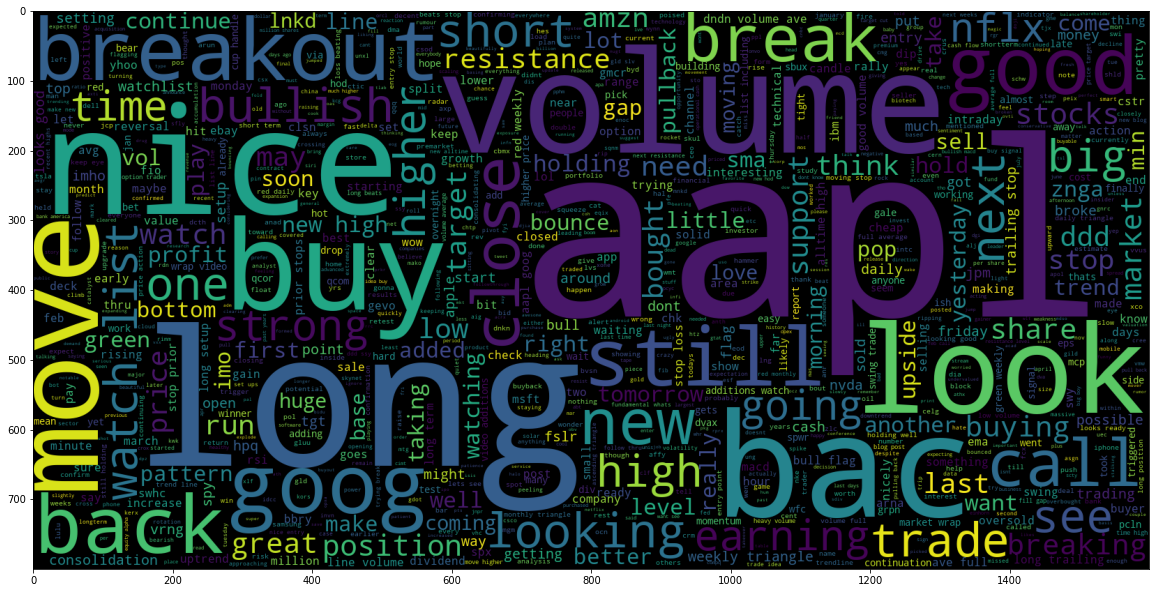

In [123]:
#Use wordcloud library to visualize the data
#use matplotlib to create our plot
plt.figure(figsize = (20, 20))
#create wordcloud object with parameters for size and number of words
#generate method will generate the wc using some source that is passed as its argument
#We only want words from positive sentiment tweets so we add the =='positive' condition
wc = WordCloud(max_words = 1000, width = 1600, height = 800).generate(" ".join(stock_df[stock_df["Sentiment"]=='positive']["Cleaned Result"]))
plt.imshow(wc)

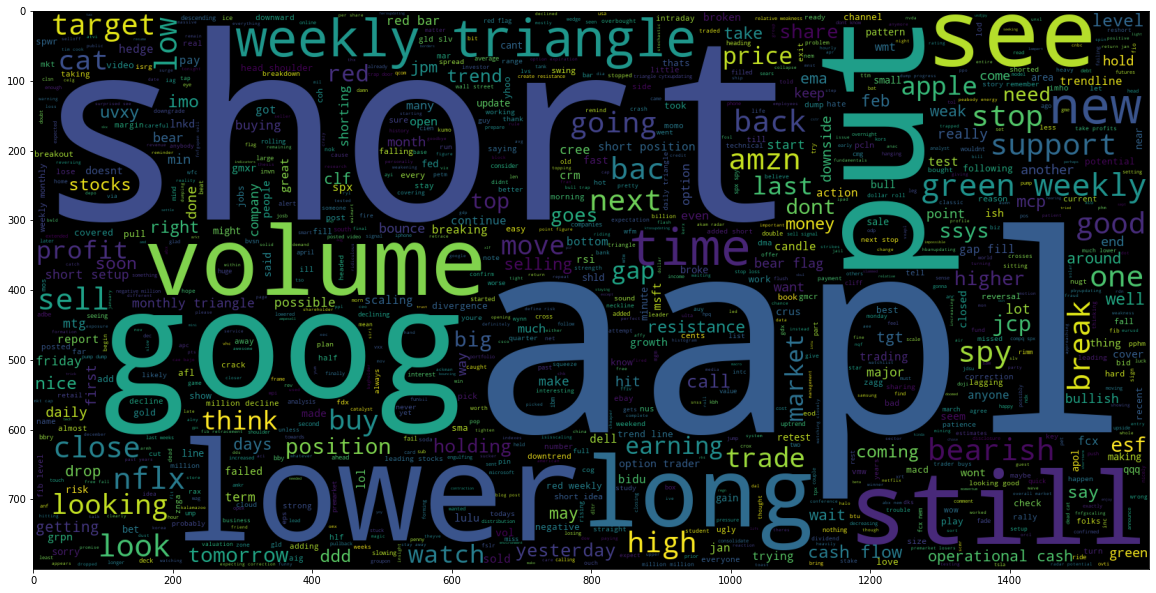

In [124]:
#same exact thing as above but this time for tweets with a negative sentiment
plt.figure(figsize = (20, 20))
wc = WordCloud(max_words = 1000, width = 1600, height = 800).generate(" ".join(stock_df[stock_df["Sentiment"]=='negative']["Cleaned Result"]))
plt.imshow(wc)

In [126]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/zcamenard/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [127]:
#Create a list with the number of words in each cleaned tweet
tweetLengths = [len(nltk.word_tokenize(x)) for x in stock_df['Cleaned Result']]
tweetLengths

[15,
 7,
 7,
 1,
 0,
 1,
 9,
 13,
 8,
 5,
 10,
 18,
 9,
 8,
 11,
 6,
 13,
 10,
 12,
 4,
 8,
 6,
 2,
 5,
 3,
 11,
 4,
 4,
 9,
 6,
 9,
 10,
 8,
 3,
 10,
 11,
 4,
 9,
 13,
 11,
 11,
 7,
 10,
 9,
 6,
 10,
 8,
 7,
 10,
 9,
 10,
 10,
 8,
 2,
 17,
 13,
 9,
 8,
 2,
 14,
 8,
 12,
 5,
 13,
 7,
 7,
 7,
 6,
 6,
 10,
 9,
 4,
 12,
 13,
 19,
 7,
 9,
 7,
 2,
 11,
 5,
 4,
 10,
 11,
 16,
 4,
 9,
 5,
 6,
 3,
 1,
 6,
 11,
 4,
 7,
 7,
 8,
 10,
 1,
 3,
 9,
 4,
 16,
 9,
 10,
 11,
 18,
 6,
 8,
 13,
 12,
 9,
 3,
 4,
 10,
 11,
 9,
 6,
 8,
 5,
 6,
 8,
 10,
 15,
 3,
 5,
 10,
 19,
 14,
 11,
 3,
 1,
 1,
 3,
 7,
 13,
 12,
 9,
 8,
 11,
 9,
 10,
 15,
 8,
 9,
 10,
 12,
 10,
 6,
 11,
 13,
 4,
 12,
 10,
 16,
 14,
 9,
 13,
 5,
 5,
 3,
 8,
 2,
 5,
 10,
 6,
 6,
 11,
 6,
 16,
 9,
 6,
 5,
 10,
 9,
 11,
 8,
 2,
 11,
 9,
 10,
 12,
 7,
 10,
 7,
 3,
 6,
 5,
 9,
 9,
 4,
 6,
 6,
 4,
 4,
 9,
 10,
 9,
 9,
 13,
 9,
 7,
 10,
 11,
 8,
 6,
 5,
 3,
 11,
 12,
 6,
 10,
 10,
 15,
 11,
 7,
 12,
 7,
 11,
 10,
 4,
 4,
 3,
 10,
 2,
 9,
 10,
 15,

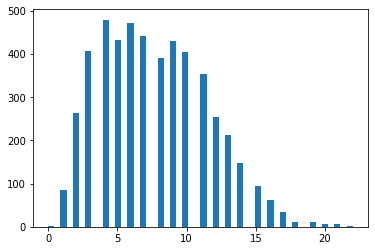

In [128]:
#Use matplotlib to create a histogram of the tweet lengths
plt.hist(tweetLengths, bins = 50)
plt.show()

In [129]:
#Interesting - most tweets seem to contain 4 to 9 words of important information that the ml program can use

In [133]:
#Create a comprehensive list of words in the data set
list_of_words = []

#iterate over every element of every list of words
for i in stock_df["Text Without Punc & Stopwords"]:
    for j in i:
        list_of_words.append(j)

#by casting our list as a set (which can't have repeats) then back to a list, we can get rid of repeats
list_of_words = list(set(list_of_words))
len(list_of_words)

6978

In [169]:
!pip install sklearn #ml library

Defaulting to user installation because normal site-packages is not writeable


In [153]:
#Problem - I need to convert my data from positive/negative to 1/0 
#(my data set is a bit different from the instructors)
stock_df["SentimentNums"] = stock_df["Sentiment"].apply(lambda x: 1 if x=='positive' else 0)

In [154]:
stock_df

,created_at,Text,Sentiment,Text Without Punctuation,Text Without Punc & Stopwords,Cleaned Result,SentimentNums
0,2013-01-01 20:10:04,Kickers on my watchlist $XIDE $TRIT $SOQ $PNK ...,positive,Kickers on my watchlist XIDE TRIT SOQ PNK CPWR...,"[kickers, watchlist, xide, trit, soq, pnk, cpw...",kickers watchlist xide trit soq pnk cpwr bpz a...,1
1,2013-01-01 20:33:37,"""@user: $AAPL MOVIE. 55% return for the FEAR/G...",positive,user AAPL MOVIE 55 return for the FEARGREED in...,"[aapl, movie, return, feargreed, indicator, tr...",aapl movie return feargreed indicator trades a...,1
2,2013-01-01 21:43:41,@user I'd be afraid to short $AMZN - they are ...,positive,user Id be afraid to short AMZN they are look...,"[afraid, short, amzn, looking, like, nearmonop...",afraid short amzn looking like nearmonopoly eb...,1
3,2013-01-02 01:49:48,$MNTA Over $12.00 URL,positive,MNTA Over 1200 URL,[mnta],mnta,1
4,2013-01-02 01:51:33,$OI Over $21.37 URL,positive,OI Over 2137 URL,[],,1
...,...,...,...,...,...,...,...
4995,2013-03-31 21:35:26,"If $AAPL goes to over $451, I will go short. S...",negative,If AAPL goes to over 451 I will go short Still...,"[aapl, goes, short, still, weak]",aapl goes short still weak,0
4996,2013-03-31 21:37:55,$MMM looks ready to break out. Looking to go l...,positive,MMM looks ready to break out Looking to go lon...,"[mmm, looks, ready, break, looking, long, mino...",mmm looks ready break looking long minor weakness,1
4997,2013-03-31 22:54:02,$AMZN - Closed over volume support inside of t...,positive,AMZN Closed over volume support inside of the...,"[amzn, closed, volume, support, inside, descen...",amzn closed volume support inside descending c...,1
4998,2013-03-31 23:22:15,$BBT coiled up after finding support at 50/200...,positive,BBT coiled up after finding support at 50200 s...,"[bbt, coiled, finding, support, smas, stress, ...",bbt coiled finding support smas stress test re...,1


In [155]:
#Split the data into testing and training data
X = stock_df['Text Without Punc & Stopwords'] #X is our input data from the tweets
y = stock_df["SentimentNums"] #y is the list of results we hope our model 
#will be able to return (the answer key basically)

#From sklearn ml library import a useful function to split our data into a training and testing group
#Specifically an 80 20 split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
#Now we have input and output data for training and testing 

In [156]:
X_test.shape #checking to see if it worked properly

(1000,)

In [157]:
X_train.shape

(4000,)

In [158]:
#Above we see that we succesfuly split the data 80 to 20

In [159]:
#Tokenize the data with a tokenizer object - requires num of words which we found earlier
tokenizer = Tokenizer(num_words = len(list_of_words))
tokenizer.fit_on_texts(X_train)

#Creat the training tokens
train_sequences = tokenizer.texts_to_sequences(X_train)

#Create the testing tokens
test_sequences = tokenizer.texts_to_sequences(X_test)

#Now we have a tokenized version of our data
#Below we see that the various words have been replaced with numbers

In [160]:
train_sequences

[[1, 14, 334, 2804, 168, 2805, 1898, 61, 2806, 1899, 2807],
 [2808, 132, 360, 361, 70, 39, 645, 13],
 [88, 50, 733, 2809, 157, 35, 169, 1016],
 [1436, 9, 44, 4, 200, 78, 734, 46],
 [2810],
 [536, 1437, 452, 1017, 2811, 98, 96, 1900],
 [2812, 201, 1, 1018, 5, 453, 735, 1901, 2813, 11, 139],
 [2814, 72],
 [362, 72, 854, 174, 45, 25],
 [253, 2815, 170, 1902, 363, 413, 27, 1903, 855],
 [29, 140, 18, 2816, 85],
 [2817, 856, 133, 1019, 2818, 1438, 386, 68, 1190, 1439, 2819],
 [454, 107],
 [1904, 16, 47],
 [1, 7, 537, 1905, 2820, 2821, 1906],
 [15,
  2822,
  2823,
  646,
  647,
  1191,
  2824,
  2825,
  489,
  220,
  1440,
  1907,
  37,
  24,
  736,
  2826],
 [1, 5, 2827, 24, 1020, 414, 90, 13, 59, 57, 1441, 857, 538, 71],
 [316, 3, 77],
 [1, 21, 202, 30, 1908, 15, 55, 237, 75, 211],
 [29, 21, 18, 2828, 85],
 [10, 300, 1021, 14, 335, 1442, 581],
 [648, 2829, 2830, 387, 42, 6, 490, 1909, 1910, 453, 2831],
 [40, 115, 317, 17, 649, 388, 82, 39, 32, 1192, 158, 737, 455, 124, 3],
 [738, 32, 1, 33,

In [161]:
test_sequences

[[215, 233, 202, 1115, 1174, 4816],
 [1814, 8, 199],
 [800, 64, 1768, 270, 1768, 106, 1755],
 [12, 387, 47, 5287, 3, 599],
 [5950, 26, 47, 6, 4, 178, 22, 2738, 13],
 [3997, 5],
 [1679, 96, 863, 468, 283, 164],
 [34, 19, 2, 294, 100, 29, 878, 22, 664, 736, 908],
 [152, 104, 32, 479],
 [227, 440, 146, 1121],
 [86, 703, 67, 1],
 [1478, 63, 28, 295, 59, 6, 120, 189],
 [545, 1772, 5228, 1067, 5289, 3529, 304, 1142, 1984, 283],
 [434, 2, 115, 447, 294, 881, 323, 4032],
 [2470, 985, 2470, 759, 335, 5473, 397],
 [1331, 1310, 16, 787, 295, 522, 2437, 68, 3, 116, 1825, 888, 4036],
 [1, 109, 636, 332, 458, 6, 27, 2187, 172],
 [1759, 5592, 5884, 854, 18, 195, 63, 235, 535, 5, 426, 51, 169, 512],
 [1740, 5, 134, 127, 114],
 [727, 4893, 13, 11, 3, 151, 78, 49, 637],
 [686, 92, 5097, 302, 31, 97],
 [2469, 266, 324, 1429, 1506, 171],
 [58, 643, 302, 2253],
 [1114, 16],
 [3814, 5606, 79],
 [7, 32, 1703, 181, 118, 60],
 [611, 1583, 666],
 [25, 34, 384, 17, 88, 102, 1677],
 [1],
 [1, 1066, 37, 105, 449],

In [ ]:
#Below is a comparison of the 2nd tweet's key words before and after tokenization

In [172]:
stock_df["Text Without Punc & Stopwords"][1]

['aapl', 'movie', 'return', 'feargreed', 'indicator', 'trades', 'awesome']

In [170]:
train_sequences[1]

[2808, 132, 360, 361, 70, 39, 645, 13]

In [162]:
#Pad the data
padded_train = pad_sequences(train_sequences, maxlen = 15, padding = 'post', truncating = 'post')
padded_test = pad_sequences(test_sequences, maxlen = 15, truncating = 'post')

In [163]:
#Convert the sentiment data to categorical 2D representation
#This is because the output (positive or negative sentiment) needs to have two nuerons
#One will be 1 while the other will be 0 depending on the output 
#One will fire while one will be "off"
y_train_cat = to_categorical(y_train, 2)
y_test_cat = to_categorical(y_test, 2)

In [165]:
y_train_cat.shape

(4000, 2)

In [167]:
y_test_cat.shape

(1000, 2)

In [168]:
y_train_cat

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [199]:
!pip install numpy --upgrade

Defaulting to user installation because normal site-packages is not writeable
  Using cached numpy-1.20.1-cp37-cp37m-manylinux2010_x86_64.whl (15.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.0
    Uninstalling numpy-1.19.0:
      Successfully uninstalled numpy-1.19.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.4.1 requires numpy~=1.19.2, but you have numpy 1.20.1 which is incompatible.


In [206]:
# the NN should be a sequential model so we create an instance of the sequential class
model = Sequential()

# add the first layer of the NN, the embedding layer
#In this case, we have embedded our thousands of data into only 512 variables
model.add(Embedding(len(list_of_words), output_dim = 512))

# Create a Bi-Directional RNN and LSTM
model.add(LSTM(256))

# Dense layers
model.add(Dense(128, activation = 'relu')) #adds 128 nuerons and chooses the relu function for activation
model.add(Dropout(0.3)) #makes sure our model doesn't overfit to the training data - we don't want it to just 
#be perfect for our data but sacrifice any hope of success with general data
model.add(Dense(2,activation = 'softmax')) #adds 2 nuerons and chooses the softmax function for activation
#compile the network
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['acc'])
#display a summary of the network
model.summary() 

NotImplementedError: Cannot convert a symbolic Tensor (lstm_8/strided_slice:0) to a numpy array. This error may indicate that you're trying to pass a Tensor to a NumPy call, which is not supported